In [10]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from logistic_utilities import lg_batch_model,ridge_batch_model,predictions,lg_mini_model 

In [11]:
data = pd.read_csv('dataset.csv')

# Missing values are represented with symbol "?"
data = data.replace({'?':np.nan})
data['class'] = data['class'].replace({'ckd\t':'ckd','notckd\t':'notckd' })
data['dm'] = data['dm'].replace({'\tyes':'yes','\tno':'no' })
data['dm'] = data['dm'].replace({' yes':'yes', 'no':'no' })



<Axes: >

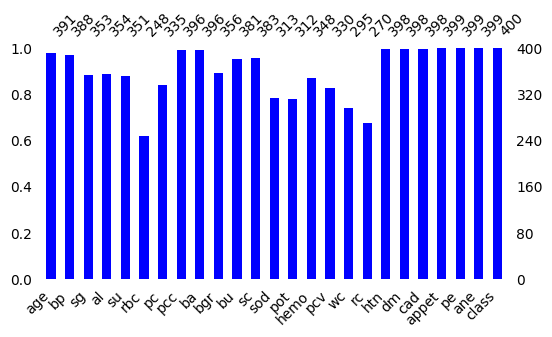

In [12]:
msno.bar(data, figsize=(6,3), fontsize=10, color='blue')

In [13]:
#Calculate Missing Values Percentage
N = data.shape[0]
column_no_missing_values = (data.isnull().sum()).sort_values()

print(f"Feature  |  Missing Percentage")
for key,value in column_no_missing_values.items():
    print(f"{key}        {(value/N)*100.00}%")


Feature  |  Missing Percentage
class        0.0%
pe        0.25%
appet        0.25%
ane        0.25%
cad        0.5%
dm        0.5%
htn        0.5%
pcc        1.0%
ba        1.0%
age        2.25%
bp        3.0%
sc        4.25%
bu        4.75%
bgr        11.0%
al        11.5%
sg        11.75%
su        12.25%
hemo        13.0%
pc        16.25%
pcv        17.5%
sod        21.75%
pot        22.0%
wc        26.25%
rc        32.5%
rbc        38.0%


In [ ]:
#Dropping features with missing values more than 20%
data = data.drop(['sod', 'pot', 'wc','rc','rbc'],axis=1)  


#Feature Selection
data_trial = data[['sg','al','hemo','htn', 'dm','bgr','sc','class' ]]
data_trial['htn']= data_trial['htn'].replace({'yes': 1,'no':0})
data_trial['dm']= data_trial['dm'].replace({'yes': 1,'no':0})
data_trial['class']= data_trial['class'].replace({'ckd': 1,'notckd':0})
data_trial

In [15]:

data_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sg      353 non-null    object 
 1   al      354 non-null    object 
 2   hemo    348 non-null    object 
 3   htn     398 non-null    float64
 4   dm      398 non-null    float64
 5   bgr     356 non-null    object 
 6   sc      383 non-null    object 
 7   class   400 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 25.1+ KB


In [16]:
data_trial = data_trial.astype(float)
data_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sg      353 non-null    float64
 1   al      354 non-null    float64
 2   hemo    348 non-null    float64
 3   htn     398 non-null    float64
 4   dm      398 non-null    float64
 5   bgr     356 non-null    float64
 6   sc      383 non-null    float64
 7   class   400 non-null    float64
dtypes: float64(8)
memory usage: 25.1 KB


In [17]:
#Missing Values Imputation
values = {'sg':data_trial['sg'].mean(), 'al':data_trial['al'].mean(), 'hemo':data_trial['hemo'].mean(),
                   'htn':data_trial['htn'].mean(), 'dm':data_trial['dm'].mean(), 'bgr':data_trial['bgr'].mean(), 
                   'sc':data_trial['sc'].mean(), 'class': data_trial['class'].mean()}
clean_data = data_trial.fillna(value=values)

clean_data.head(10)

,sg,al,hemo,htn,dm,bgr,sc,class
0,1.020,1.0,15.4,1.0,1.0,121.000000,1.2,1.0
1,1.020,4.0,11.3,0.0,0.0,148.036517,0.8,1.0
2,1.010,2.0,9.6,0.0,1.0,423.000000,1.8,1.0
3,1.005,4.0,11.2,1.0,0.0,117.000000,3.8,1.0
4,1.010,2.0,11.6,0.0,0.0,106.000000,1.4,1.0
5,1.015,3.0,12.2,1.0,1.0,74.000000,1.1,1.0
6,1.010,0.0,12.4,0.0,0.0,100.000000,24.0,1.0
7,1.015,2.0,12.4,0.0,1.0,410.000000,1.1,1.0
8,1.015,3.0,10.8,1.0,1.0,138.000000,1.9,1.0
9,1.020,2.0,9.5,1.0,1.0,70.000000,7.2,1.0


<AxesSubplot: title={'center': 'Class Imbalance of the Dataset'}>

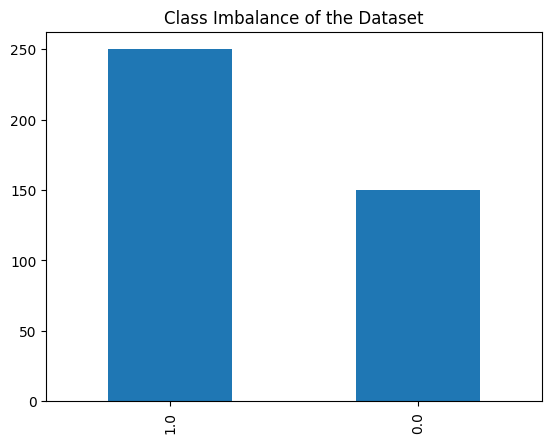

In [10]:
# Class Imbalance
clean_data['class'].value_counts().plot.bar(title='Class Imbalance of the Dataset')  

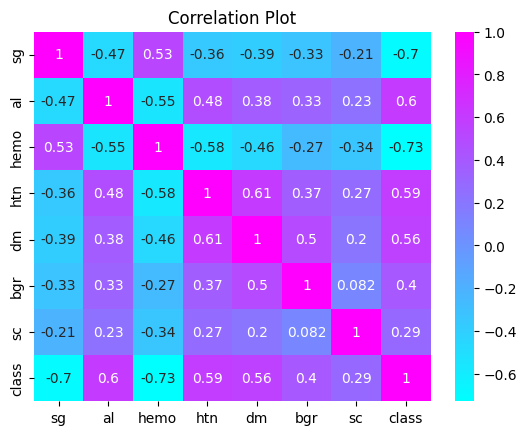

In [11]:
# Correlation Map Plot
sns.heatmap(clean_data.corr(), annot=True, cmap='cool')
plt.title('Correlation Plot')
plt.show()

In [18]:
# Feature Scaling MINMAX
clean_data_minmax = (clean_data - clean_data.min())/(clean_data.max() - clean_data.min())


# Shuffling the dataset
shuffle = clean_data_minmax.sample(frac=1)
shuffle.to_csv('trial1_data')
shuffle_data = pd.read_csv('trial1_data')
shuffled_data = shuffle_data.drop(['Unnamed: 0'], axis=1)

X_minmax = shuffled_data.drop(['class'], axis=1)
Y_minmax = shuffled_data['class']

In [19]:

# Shuffling the dataset and feature scaling with std Gaussian
shuffle = clean_data.sample(frac=1)
shuffle.to_csv('trial2_data')
shuffle_data = pd.read_csv('trial2_data')
shuffled_data = shuffle_data.drop(['Unnamed: 0'], axis=1)

X_temp = shuffled_data.drop(['class'], axis=1)
X_std = (X_temp - X_temp.mean())/X_temp.std()
Y_std = shuffled_data['class']

X_std.to_csv('std_data')


# standardized_data = pd.concat([X_std, Y_std])
# standardized_data.to_csv('stddata')
X_std.head(10)

,sg,al,hemo,htn,dm,bgr,sc
0,-4.135388e-14,0.000000,-2.292358,1.308347,-0.725412,-0.602232,0.396538
1,4.827501e-01,-0.799289,1.021130,-0.766243,-0.725412,0.000000,0.000000
2,4.827501e-01,-0.799289,0.910680,-0.766243,-0.725412,-0.709209,-0.457937
3,-1.379663e+00,-0.013321,0.027083,1.308347,1.381990,3.690208,-0.244318
4,-4.484564e-01,-0.013321,-0.930146,1.308347,1.381990,-0.762697,-0.155310
5,4.827501e-01,-0.799289,0.000000,-0.766243,-0.725412,-0.134209,-0.351127
6,1.413957e+00,1.558613,0.027083,1.308347,1.381990,-0.348163,-0.244318
7,1.413957e+00,-0.799289,0.321616,-0.766243,-0.725412,-0.374907,-0.404532
8,-1.379663e+00,-0.799289,-0.635614,1.308347,1.381990,-0.214442,-0.048501
9,-4.484564e-01,1.558613,-0.893330,-0.766243,-0.725412,-0.548744,-0.279921


In [21]:
X = X_std
Y = Y_std




In [22]:
shuffle_data = pd.read_csv('trial2_data')
shuffled_data = shuffle_data.drop(['Unnamed: 0'], axis=1)

X_temp = shuffled_data.drop(['class'], axis=1)
X_std = (X_temp - X_temp.mean())/X_temp.std()
Y_std = shuffled_data['class']

X_std.to_csv('std_data')


X = np.array(X_std)
Y = np.array(Y_std)
Y = Y.reshape(400,1)

Y.shape, X.shape


permutations = np.random.permutation(len(X))

X = X[permutations]
Y = Y[permutations]
num_train_samples = int(len(X)*0.8)
X_train,X_val = X[:num_train_samples], X[num_train_samples:]
Y_train,Y_val= Y[:num_train_samples], Y[num_train_samples:] 

In [23]:
#Splitting data into trainset and validation set 15%
permutations = np.random.permutation(len(X))

X = X[permutations]
Y = Y[permutations]
num_train_samples = int(len(X)*0.8)
X_train,X_val = X[:num_train_samples], X[num_train_samples:]
Y_train,Y_val= Y[:num_train_samples], Y[num_train_samples:] 


np.sum(Y_val)
# X_train = x
# X_val = xt
# Y_train = y
# Y_val =yt


53.0

1.0


1.0

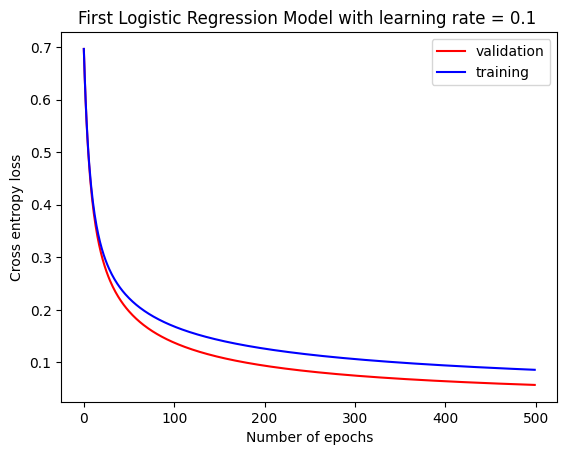

In [24]:
epochs = 500
learning_rate = 0.1
results = lg_batch_model(X_train,Y_train,X_val,Y_val,learning_rate, epochs)

parameters0 = results['parameters']
train_cost0 = results['train_cost']
val_cost0 = results['val_cost']

predict, accuracy = predictions(X_val,Y_val,parameters0)

print(accuracy)
plt.plot(val_cost0, 'r')
plt.plot(train_cost0, 'b')
plt.xlabel('Number of epochs')
plt.ylabel('Cross entropy loss')
plt.legend(['validation','training'])
plt.title('First Logistic Regression Model with learning rate = 0.1 ')

lg_true_positive =np.sum((predict == 1) & (Y_val.T == 1))
lg_true_positive/np.sum(Y_val)



Text(0.5, 1.0, 'Correlation Matrix')

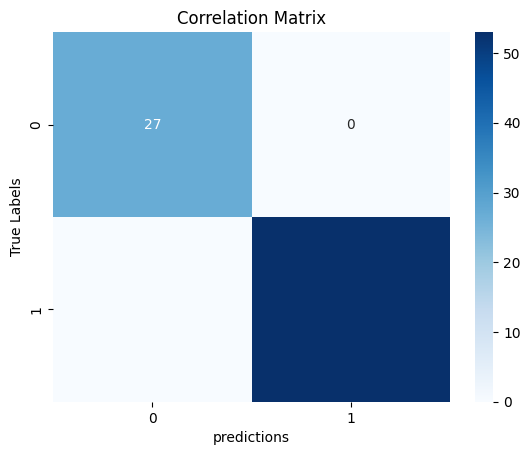

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_val.T.astype(int).reshape(80,), predict.astype(int).reshape(80,))
sns.heatmap(cm, annot= True, cmap='Blues')
plt.xlabel('predictions')
plt.ylabel('True Labels')
plt.title('Correlation Matrix')

0.9875


Text(0.5, 1.0, '2nd logistic model with learning rate = 0.1 and batch size =32 ')

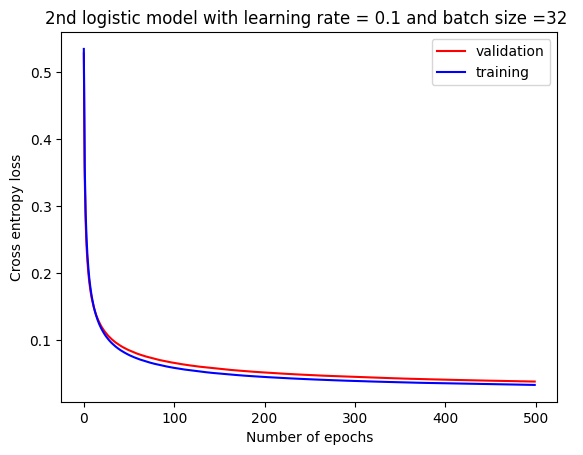

In [438]:
mini_batch_size = 32
max_epochs = 500
learning_rate = 0.1
parameters_mini, train_cost_mini, val_cost_mini = lg_mini_model(X_train,Y_train,X_val,Y_val,mini_batch_size,learning_rate,max_epochs)
predict, accuracy = predictions(X_val,Y_val,parameters_mini)
print(accuracy)
plt.plot(val_cost_mini, 'r')
plt.plot(train_cost_mini, 'b')
plt.legend(['validation','training'])
plt.xlabel('Number of epochs')
plt.ylabel('Cross entropy loss')
plt.legend(['validation','training'])
plt.title('2nd logistic model with learning rate = 0.1 and batch size =32 ')


Text(0.5, 1.0, 'Correlation Matrix')

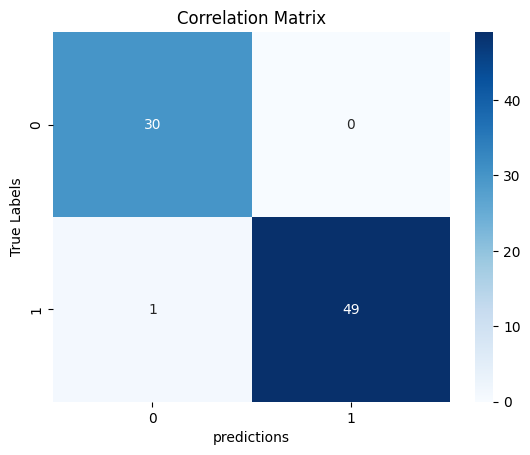

In [439]:
cm = confusion_matrix(Y_val.T.astype(int).reshape(80,), predict.astype(int).reshape(80,))
sns.heatmap(cm, annot= True, cmap='Blues')
plt.xlabel('predictions')
plt.ylabel('True Labels')
plt.title('Correlation Matrix')

0.95


Text(0.5, 1.0, '3nd logistic model with learning rate = 0.1 and lambda = 4')

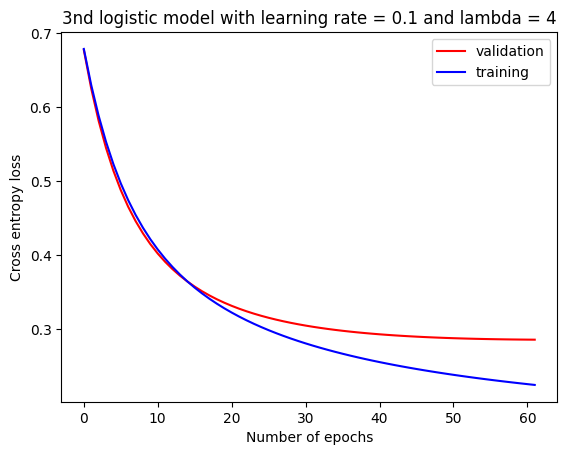

In [440]:
epochs = 62
learning_rate = 0.1
lambda_parameter = 4
results = ridge_batch_model(X_train,Y_train,X_val,Y_val,learning_rate, epochs,lambda_parameter)

parameters1 = results['parameters']
train_cost1 = results['train_cost']
val_cost1 = results['val_cost']


predict, accuracy = predictions(X_val,Y_val,parameters1)
print(accuracy)
plt.plot(val_cost1 ,'r')
plt.plot(train_cost1, 'b')
plt.legend(['validation','training'])
plt.legend(['validation','training'])
plt.xlabel('Number of epochs')
plt.ylabel('Cross entropy loss')
plt.legend(['validation','training'])
plt.title('3nd logistic model with learning rate = 0.1 and lambda = 4')



Text(0.5, 1.0, 'Correlation Matrix')

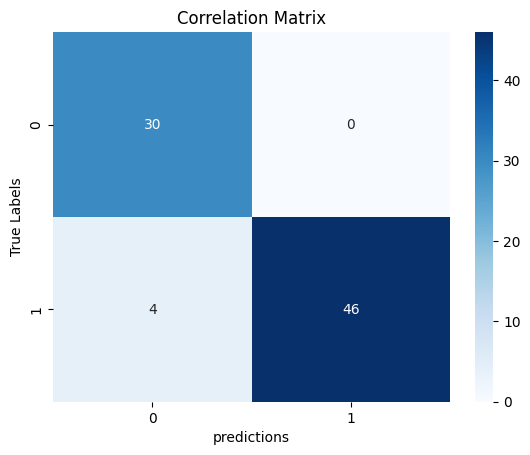

In [441]:
cm = confusion_matrix(Y_val.T.astype(int).reshape(80,), predict.astype(int).reshape(80,))
sns.heatmap(cm, annot= True, cmap='Blues')
plt.xlabel('predictions')
plt.ylabel('True Labels')
plt.title('Correlation Matrix')

In [442]:
from nn_utilities import *
max_epochs = 100
learning_rate = 0.1
mini_batch_size = 16
layers_dimension= (7,8,1)

parametersn, train_costn, val_costn =train_model2(X_train,Y_train,X_val,Y_val,mini_batch_size,layers_dimension,learning_rate,max_epochs)


In [443]:
predictionsn, accuracyn = make_predictions(X_val,Y_val,parametersn,'2')

[0.6823568336338284,
 0.6692193053515632,
 0.6649689622509039,
 0.6634694946250403,
 0.6604713984616934,
 0.6522095696531773,
 0.610810452530602,
 0.47946528727664905,
 0.31396700317029747,
 0.2107749823092288,
 0.15284516145265897,
 0.11911886767164279,
 0.09772546935700577,
 0.08403658408888788,
 0.07441104601382363,
 0.06752800568483146,
 0.062065180779626514,
 0.05753409893890819,
 0.0540799354514929,
 0.0517018572427459,
 0.04896068649366959,
 0.04680616712040469,
 0.04509105732133471,
 0.04320406134178732,
 0.04201193728406884,
 0.04129688298170865,
 0.03967575845301074,
 0.039102103793820404,
 0.03857156345385744,
 0.03668262941331922,
 0.03609770465141692,
 0.036027694810479856,
 0.0349912745122166,
 0.034446084303993665,
 0.03368241543087062,
 0.0334139349303787,
 0.03267022158242365,
 0.032338918204871066,
 0.03211127870743893,
 0.03149062080684567,
 0.03132181409890055,
 0.03075452645815982,
 0.030545108949056127,
 0.030291256532059625,
 0.03026569888040364,
 0.0294776745866

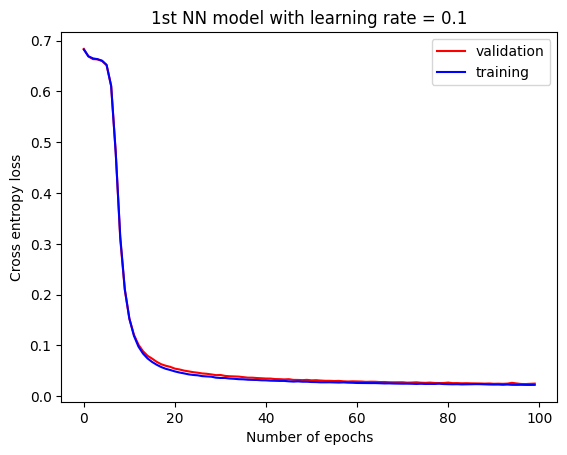

In [444]:
plt.plot(val_costn, 'r')
plt.plot(train_costn, 'b')
plt.legend(['validation','training'])
plt.xlabel('Number of epochs')
plt.ylabel('Cross entropy loss')
plt.legend(['validation','training'])
plt.title('1st NN model with learning rate = 0.1')
accuracyn

train_costn

Text(0.5, 1.0, 'Correlation Matrix')

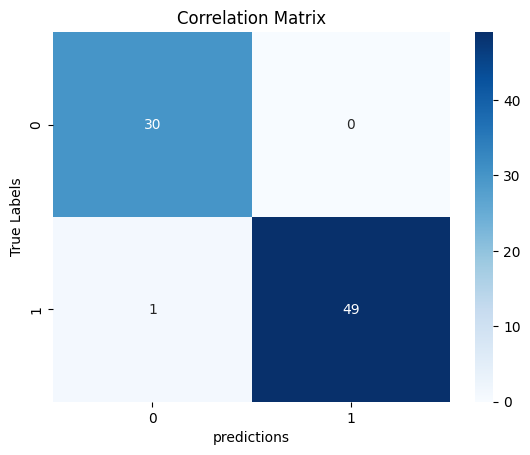

In [445]:
cm = confusion_matrix(Y_val.T.astype(int).reshape(80,), predictionsn.astype(int).reshape(80,))
sns.heatmap(cm, annot= True, cmap='Blues')
plt.xlabel('predictions')
plt.ylabel('True Labels')
plt.title('Correlation Matrix')

In [446]:
max_epochs = 100
learning_rate = 0.1
mini_batch_size = 16
layers_dimension= (7,8,1)
momentum_rate = 0.85
parametersm, train_costm, val_costm = train_modelwithmomentum(X_train,Y_train,X_val,Y_val,mini_batch_size,layers_dimension,learning_rate,max_epochs,momentum_rate)



[0.6864338891643594,
 0.6705202755201302,
 0.6645208446549064,
 0.6624829858418558,
 0.6617334935992301,
 0.6603627593761481,
 0.6574378921399331,
 0.6443187793774887,
 0.6009070771913932,
 0.4802709223148985,
 0.30683583522179514,
 0.19448699354158466,
 0.14031271069882106,
 0.1073227844983157,
 0.08902164571352941,
 0.07749178380318787,
 0.06891068983656914,
 0.06269199362996494,
 0.05796470964877726,
 0.05418068760590285,
 0.05106547984566231,
 0.04861460500034438,
 0.04637147652355483,
 0.04511484864627492,
 0.04314329540294458,
 0.041633135700350286,
 0.04082759458640568,
 0.039204759567127045,
 0.038419772388425394,
 0.037871641980639595,
 0.03666061020461142,
 0.03592070080980633,
 0.035027113872883264,
 0.03430278436760993,
 0.03371671902525965,
 0.03326670833767166,
 0.032929876546969127,
 0.03228597302802386,
 0.03187004451288411,
 0.03131537210479241,
 0.030957753797388347,
 0.030828456619343497,
 0.030153700395035822,
 0.029946835591618048,
 0.029994771458716447,
 0.0296082

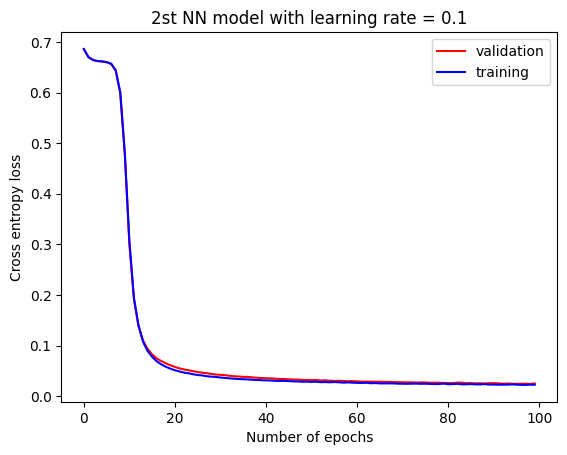

In [447]:
predictionsm, accuracym = make_predictions(X_val,Y_val,parametersn,'2')
plt.plot(val_costm, 'r')
plt.plot(train_costm, 'b')
plt.legend(['validation','training'])
plt.xlabel('Number of epochs')
plt.ylabel('Cross entropy loss')
plt.legend(['validation','training'])
plt.title('2st NN model with learning rate = 0.1')
accuracyn

accuracym
train_costm

Text(0.5, 1.0, 'Correlation Matrix')

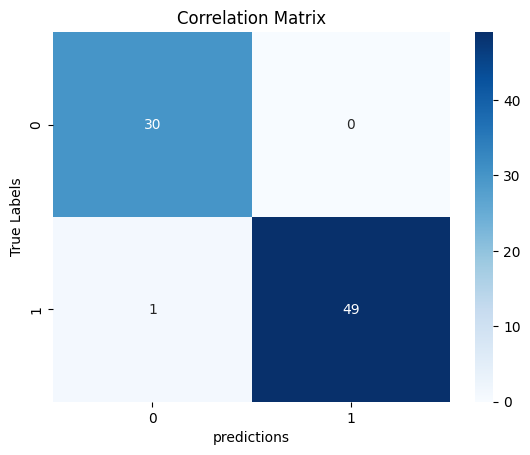

In [448]:
cm = confusion_matrix(Y_val.T.astype(int).reshape(80,), predictionsm.astype(int).reshape(80,))
sns.heatmap(cm, annot= True, cmap='Blues')
plt.xlabel('predictions')
plt.ylabel('True Labels')
plt.title('Correlation Matrix')

In [449]:
from knn_utilities import *

Y_train = Y_train.reshape(320,)
for k in range(3,30,2):
    _,a = predict_accuracy(k, X_train, Y_train, X_val, Y_val)
    print(k,a)
k =3



3 0.9875
5 0.975
7 0.975
9 0.975
11 0.975
13 0.975
15 0.975
17 0.975
19 0.975
21 0.975
23 0.975
25 0.975
27 0.9625
29 0.9625


Text(0.5, 1.0, 'Correlation Matrix, K = 3')

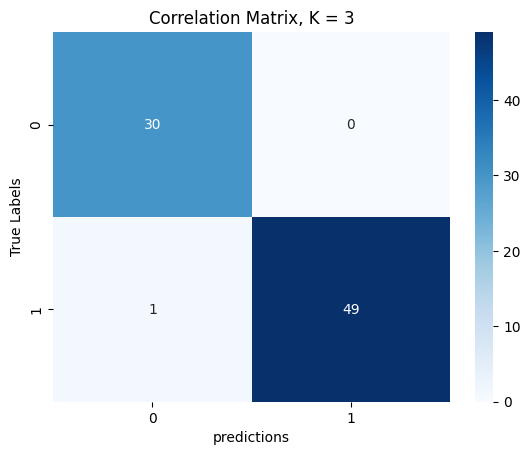

In [450]:
predict,a = predict_accuracy(k, X_train, Y_train, X_val, Y_val)

cm = confusion_matrix(Y_val.T.astype(int).reshape(80,), predict.astype(int).reshape(80,))
sns.heatmap(cm, annot= True, cmap='Blues')
plt.xlabel('predictions')
plt.ylabel('True Labels')
plt.title('Correlation Matrix, K = 3')